In [1]:
pip install kaggle

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105796 sha256=1426ca04aabe69f63a5aec131ebf31977957c70f8d7532c0c4bf1a3ef1b6062e
  Stored in directory: c:\users\nikhi\appdata\local\pip\cache\wheels\46\d2\26\84d0a1acdb9c6baccf7d28cf06962ec80529fe1ad938489983
Successfully built kaggle



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
    --------------------------------------- 0.3/12.6 MB ? eta -:--:--
    --------------------------------------- 0.3/12.6 MB ? eta -:--:--
    --------------------------------------- 0.3/12.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.6 MB 419.4 kB/s eta 0:00:29
   - -------------------------------------- 0.5/12.6 MB 419.4 kB/s eta 0:00:29
   - -------------------------------------- 0.5/12.6 MB 419.4 kB/s eta 0:00:29
   - -------------------------------------- 0.5/12.6 MB 419.4 kB/s eta 0:00:29
   - -------------------------------------- 0.5/12.6 MB 419.4 kB/s eta 0:00:29
   -- ------------------------------------- 0.8/12.6 MB 296.9 kB/s eta 0:00:40
   -- --------------------------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install pandas nltk scikit-learn


Defaulting to user installation because normal site-packages is not writeable
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
    --------------------------------------- 0.3/11.5 MB ? eta -:--:--
    --------------------------------------- 0.3/11.5 MB ? eta -:--:--
    --------------------------------------- 0.3/11.5 MB ? eta -:--:--
    --------------------------------------- 0.3/11.5 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.5 MB 299.6 kB/s eta 0:00:37
   - -------------------------------------- 0.5/11.5 MB 299.6 kB/s eta 0:00:37
   - -------------------------------------- 0.5/11.5 MB 299.6 kB/s eta 0:


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [4]:
# column_names = ['target', 'ids', 'date','flag','user','text']
twitter_data = pd.read_csv("Twitter_Data.csv", encoding = 'ISO-8859-1')

twitter_data.head()

,clean_text,category
0,when modi promised âminimum government maxim...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [6]:
twitter_data['target'] = twitter_data['category'].replace(-1, 2)

In [8]:
twitter_data = twitter_data.dropna()

In [10]:
twitter_data.isnull().sum()

clean_text    0
category      0
target        0
dtype: int64

In [11]:
# checking the distribution of target col

twitter_data['target'].value_counts()

target
1.0    72249
0.0    55211
2.0    35509
Name: count, dtype: int64

In [12]:
twitter_data.shape

(162969, 3)

In [13]:
# counting the num of missing values in the dataset
twitter_data.isnull().sum()

clean_text    0
category      0
target        0
dtype: int64

In [14]:
# checking the distribution of target col

twitter_data['target'].value_counts()

target
1.0    72249
0.0    55211
2.0    35509
Name: count, dtype: int64

In [15]:
# convet the target "4" to "1"

twitter_data['target'] = twitter_data['target'].replace(4, 1)

In [16]:
twitter_data['target'].value_counts()

target
1.0    72249
0.0    55211
2.0    35509
Name: count, dtype: int64

In [17]:
port_stem = PorterStemmer()

In [18]:
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)
  return stemmed_content

In [19]:
twitter_data['stemmed_content'] = twitter_data['clean_text'].apply(stemming)

In [20]:
twitter_data.head()

,clean_text,category,target,stemmed_content
0,when modi promised âminimum government maxim...,-1.0,2.0,modi promis minimum govern maximum govern expe...
1,talk all the nonsense and continue all the dra...,0.0,0.0,talk nonsens continu drama vote modi
2,what did just say vote for modi welcome bjp t...,1.0,1.0,say vote modi welcom bjp told rahul main campa...
3,asking his supporters prefix chowkidar their n...,1.0,1.0,ask support prefix chowkidar name modi great s...
4,answer who among these the most powerful world...,1.0,1.0,answer among power world leader today trump pu...


In [21]:
print(twitter_data['stemmed_content'])

0         modi promis minimum govern maximum govern expe...
1                      talk nonsens continu drama vote modi
2         say vote modi welcom bjp told rahul main campa...
3         ask support prefix chowkidar name modi great s...
4         answer among power world leader today trump pu...
                                ...                        
162975    crore paid neerav modi recov congress leader h...
162976    dear rss terrorist payal gawar modi kill plu m...
162977                            cover interact forum left
162978    big project came india modi dream project happ...
162979    ever listen like gurukul disciplin maintain ev...
Name: stemmed_content, Length: 162969, dtype: object


In [22]:
# separating the data and label
X = twitter_data['stemmed_content'].values
Y = twitter_data['target'].values

In [23]:
print(X)

['modi promis minimum govern maximum govern expect begin difficult job reform state take year get justic state busi exit psu templ'
 'talk nonsens continu drama vote modi'
 'say vote modi welcom bjp told rahul main campaign modi think modi relax'
 ... 'cover interact forum left'
 'big project came india modi dream project happen realiti'
 'ever listen like gurukul disciplin maintain even narendra modi rss maintain cultur indian attack polit someon attack hinduism rss take action proud']


In [24]:
print(Y)

[2. 0. 1. ... 0. 0. 1.]


In [25]:
# Spliting the data into train and test

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((130375,), (32594,), (130375,), (32594,))

In [26]:
print(X_train)

['hon ble modi india need talent protect encourag mechan talent born villag also till date mechan tap identifi talent encourag state polici take agenda poll commit protect need'
 'head design develop modi unho aaj achiev modifi kar diya'
 'chaukidar vinod thakur modi' ... 'nyay scare bjp modi rahul'
 'modi gut take strong decis peopl dont'
 'dhirendra singh talk dynasti polit preval opposit parti selfish need contrast modi pradhan sevak serv countri']


In [27]:
print(X_test)

['modi play polit mission shakti elector gain say mayawati'
 'hafiz saeed prais barkha isro chairman appreci modi mission shakti get threat frm terrorist group jaishemoham arshi khan paint pakistan flag halfnud bodi want pak citizenship join congress di kolaverid'
 'looter modi second bail applic reject london court' ...
 'mission onward modi'
 'dear prime minist shri narendra modi stand strength countri like dedic poem view'
 'last date submit retir form st march']


In [28]:
# converting the textual data to numerical data

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [29]:
print(X_train)

  (0, 27495)	0.1754901310441301
  (0, 8086)	0.2012938010061837
  (0, 40241)	0.024631582451033016
  (0, 28984)	0.06247694811181938
  (0, 43325)	0.1955992034813229
  (0, 61997)	0.5128331770093563
  (0, 50699)	0.28871917198738806
  (0, 19474)	0.3259989889046059
  (0, 38889)	0.4105705406892172
  (0, 8572)	0.1579247844104573
  (0, 67732)	0.14857792234357037
  (0, 2136)	0.09380185473409298
  (0, 63992)	0.12795612395830838
  (0, 15180)	0.1572638294347073
  (0, 62140)	0.20927673968303354
  (0, 28275)	0.17982102533187935
  (0, 60083)	0.11131656300379292
  (0, 48998)	0.12387946980154715
  (0, 61929)	0.09380185473409298
  (0, 1385)	0.13259726918110112
  (0, 49140)	0.12476504746226522
  (0, 12723)	0.14825197383092326
  (1, 40241)	0.049492532246272716
  (1, 26361)	0.27552233136024945
  (1, 16295)	0.34348060531029867
  :	:
  (130372, 55980)	0.6080344542669437
  (130372, 44790)	0.5972132163510943
  (130373, 40241)	0.0897271088526014
  (130373, 61929)	0.3416982748483091
  (130373, 17807)	0.32380809385

In [30]:
print(X_test)

  (0, 19203)	0.4180869337075271
  (0, 22908)	0.3996924005497795
  (0, 38739)	0.463419903608668
  (0, 39953)	0.30494311961677234
  (0, 40241)	0.06763301639557738
  (0, 48517)	0.35477584403197815
  (0, 49028)	0.2663885044060786
  (0, 55803)	0.22515130809917636
  (0, 57167)	0.3249691005459926
  (1, 3426)	0.16629098716298185
  (1, 3790)	0.25691345460853604
  (1, 5851)	0.21566576237416019
  (1, 8305)	0.16402323904061014
  (1, 10438)	0.19590049722349043
  (1, 12055)	0.2088074058804644
  (1, 13150)	0.0925449462360136
  (1, 16795)	0.20229574929679717
  (1, 21786)	0.20185826053410236
  (1, 22507)	0.18971213879828716
  (1, 23544)	0.10293205434480451
  (1, 24889)	0.16613327523696414
  (1, 25430)	0.22156210505074758
  (1, 25699)	0.28656248544669544
  (1, 30362)	0.1382197579975075
  (1, 30965)	0.23587766081405817
  :	:
  (32590, 60197)	0.20483370513355306
  (32590, 69646)	0.18131858841954526
  (32591, 39953)	0.49526606183226957
  (32591, 40241)	0.10984454321242072
  (32591, 45434)	0.861768939057105

Training the Machine learning model

Logistic regression

In [31]:
model = LogisticRegression(max_iter=1000)

In [32]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

model evalution for accuracy

accuracy score

In [33]:
#accuracy score on the training data

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score( Y_train,X_train_prediction)

In [34]:
print('Accuracy score of the training data :', training_data_accuracy)

Accuracy score of the training data : 0.8739252157238735


In [35]:
#accuracy score on the test data

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score( Y_test, X_test_prediction)

In [36]:
print('Accuracy score of the test data :', test_data_accuracy)

Accuracy score of the test data : 0.8458918819414616


<h1>Saving Model<h1>

In [40]:
import pickle

In [41]:
filename = 'twitter_model.pkl'
pickle.dump(model, open(filename, 'wb'))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86     11042
         1.0       0.88      0.86      0.87     14450
         2.0       0.82      0.72      0.77      7102

    accuracy                           0.85     32594
   macro avg       0.84      0.83      0.83     32594
weighted avg       0.85      0.85      0.84     32594


Detailed Metrics:
Precision (per class): [0.81847808 0.88037224 0.82204069]
Recall (per class): [0.90979895 0.85764706 0.72261335]
F1-Score (per class): [0.86172585 0.86886108 0.76912701]

Macro Averages:
Macro Precision: 0.8402970025750607
Macro Recall: 0.8300197855472607
Macro F1-Score: 0.8332379821106151

Weighted Averages:
Weighted Precision: 0.8466940785003942
Weighted Recall: 0.8458918819414616
Weighted F1-Score: 0.8447125089873261


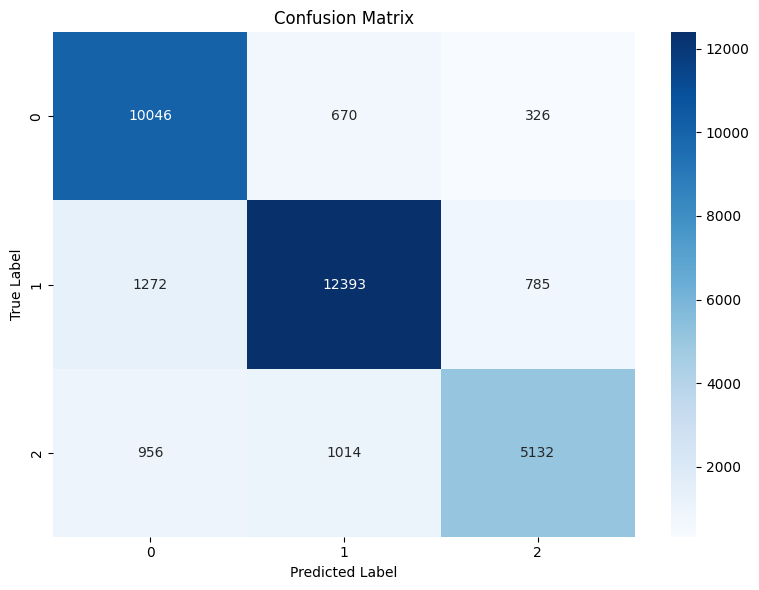

In [42]:
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the saved model and vectorizer
loaded_model = pickle.load(open('twitter_model.pkl', 'rb'))
vectorizer = TfidfVectorizer()

# Recompute the test data transformations
X_train, X_test, Y_train, Y_test = train_test_split(
    twitter_data['stemmed_content'].values, 
    twitter_data['target'].values, 
    test_size=0.2, 
    stratify=twitter_data['target'].values, 
    random_state=2
)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Make predictions
Y_pred = loaded_model.predict(X_test)

# Comprehensive Evaluation Metrics
def evaluate_model(Y_true, Y_pred):
    # Classification Report
    print("Classification Report:")
    print(classification_report(Y_true, Y_pred))
    
    # Precision, Recall, F1-Score for each class
    precision = precision_score(Y_true, Y_pred, average=None)
    recall = recall_score(Y_true, Y_pred, average=None)
    f1 = f1_score(Y_true, Y_pred, average=None)
    
    print("\nDetailed Metrics:")
    print("Precision (per class):", precision)
    print("Recall (per class):", recall)
    print("F1-Score (per class):", f1)
    
    # Macro and Weighted Averages
    print("\nMacro Averages:")
    print("Macro Precision:", precision_score(Y_true, Y_pred, average='macro'))
    print("Macro Recall:", recall_score(Y_true, Y_pred, average='macro'))
    print("Macro F1-Score:", f1_score(Y_true, Y_pred, average='macro'))
    
    print("\nWeighted Averages:")
    print("Weighted Precision:", precision_score(Y_true, Y_pred, average='weighted'))
    print("Weighted Recall:", recall_score(Y_true, Y_pred, average='weighted'))
    print("Weighted F1-Score:", f1_score(Y_true, Y_pred, average='weighted'))
    
    # Confusion Matrix
    cm = confusion_matrix(Y_true, Y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

# Run the evaluation
evaluate_model(Y_test, Y_pred)

<h1>using save model for prediction<h1>

In [40]:
# loading the saved model

loaded_model = pickle.load(open('twitter_model.pkl', 'rb'))

In [42]:
X_new = X_test[5]
print(Y_test[5])

prediction = loaded_model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('Negative tweet')
else:
  print('Positive tweet')

0
[0]
Negative tweet


# Twitter Sentiment Analysis Model Evaluation Report

## Dataset Characteristics
- **Total Samples**: 162,969
- **Class Distribution**:
  - Positive (1.0): 72,249 (44.3%)
  - Negative (0.0): 55,211 (33.9%)
  - Neutral (2.0): 35,509 (21.8%)

## Model Performance Overview

### Accuracy Metrics
| Metric | Value |
|--------|-------|
| Training Accuracy | 0.8739 |
| Test Accuracy | 0.8459 |

### Detailed Performance Metrics

#### Precision
| Class | Precision |
|-------|-----------|
| Negative (0.0) | 0.82 |
| Positive (1.0) | 0.88 |
| Neutral (2.0) | 0.82 |

#### Recall
| Class | Recall |
|-------|--------|
| Negative (0.0) | 0.91 |
| Positive (1.0) | 0.86 |
| Neutral (2.0) | 0.72 |

#### F1-Score
| Class | F1-Score |
|-------|----------|
| Negative (0.0) | 0.86 |
| Positive (1.0) | 0.87 |
| Neutral (2.0) | 0.77 |

## Advanced Performance Metrics

### Macro Averages
| Metric | Value |
|--------|-------|
| Macro Precision | 0.84 |
| Macro Recall | 0.83 |
| Macro F1-Score | 0.83 |

### Weighted Averages
| Metric | Value |
|--------|-------|
| Weighted Precision | 0.85 |
| Weighted Recall | 0.85 |
| Weighted F1-Score | 0.84 |

## Model Complexity Analysis
- **Variance Analysis**:
  - Training Accuracy: 0.8739
  - Test Accuracy: 0.8459
  - Difference: 0.028 (Moderate Variance)

## Preprocessing Techniques
- Text Preprocessing:
  - Porter Stemming
  - Stopword Removal
  - Lowercasing
- Feature Extraction:
  - TF-IDF Vectorization

## Key Findings
1. **Model Performance**
   - Overall test accuracy of 84.59%
   - Training accuracy of 87.39%
   - Moderate variance indicates slight overfitting
   - Strong performance in negative and positive sentiment classification
   - Relatively weaker performance in neutral sentiment prediction

2. **Sentiment Classification**
   - Highest precision for positive sentiment (0.88)
   - Highest recall for negative sentiment (0.91)
   - Neutral sentiment shows the lowest recall (0.72)

3. **Model Characteristics**
   - Logistic Regression model
   - Max iterations set to 1000
   - Balanced performance across different sentiment classes

## Recommendations
1. Mitigate overfitting:
   - Implement regularization techniques
   - Collect more diverse training data
2. Improve neutral sentiment classification
3. Explore advanced feature engineering techniques
4. Consider ensemble methods or more complex models

## Model Deployment
- Model saved as 'twitter_model.pkl'
- Ready for sentiment prediction on new Twitter text data

## Limitations
- Moderate variance between training and test accuracy
- Potential bias in neutral sentiment classification
- Performance may vary with different datasets

## Future Work
- Experiment with regularization techniques
- Implement cross-validation
- Explore advanced text representation methods
- Develop more sophisticated sentiment analysis models

## Conclusion
The Logistic Regression model provides a robust foundation for Twitter sentiment analysis, with balanced performance across positive and negative sentiments. The moderate variance suggests room for improvement through advanced regularization and feature engineering techniques.